In [1]:
import yfinance as yf
import pandas as pd

In [2]:
NVDA = yf.download("NVDA")

[*********************100%***********************]  1 of 1 completed


In [7]:
S_P = yf.download("^GSPC")

[*********************100%***********************]  1 of 1 completed


In [9]:
S_P = S_P[-len(NVDA):]

In [10]:
S_P

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,1235.160034,1236.410034,1217.969971,1225.189941,1225.189941,785900000
1999-01-25,1225.189941,1233.979980,1219.459961,1233.979980,1233.979980,723900000
1999-01-26,1233.979980,1253.250000,1233.979980,1252.310059,1252.310059,896400000
1999-01-27,1252.310059,1262.609985,1242.819946,1243.170044,1243.170044,893800000
1999-01-28,1243.170044,1266.400024,1243.170044,1265.369995,1265.369995,848800000
...,...,...,...,...,...,...
2022-12-12,3939.290039,3990.709961,3935.300049,3990.560059,3990.560059,3904130000
2022-12-13,4069.379883,4100.959961,3993.030029,4019.649902,4019.649902,5079360000
2022-12-14,4015.540039,4053.760010,3965.649902,3995.320068,3995.320068,4472340000


In [11]:
NVDA

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1999-01-22,0.437500,0.488281,0.388021,0.410156,0.376422,271468800.0
1999-01-25,0.442708,0.458333,0.410156,0.453125,0.415856,51048000.0
1999-01-26,0.458333,0.467448,0.411458,0.417969,0.383592,34320000.0
1999-01-27,0.419271,0.429688,0.395833,0.416667,0.382397,24436800.0
1999-01-28,0.416667,0.419271,0.412760,0.415365,0.381202,22752000.0
...,...,...,...,...,...,...
2022-12-12,170.369995,175.380005,167.970001,175.350006,175.350006,45732800.0
2022-12-13,185.309998,187.899994,177.110001,180.720001,180.720001,65658900.0
2022-12-14,179.869995,182.520004,174.199997,176.740005,176.740005,49688800.0


In [3]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import math

In [13]:
NVDA.dtypes

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume       float64
dtype: object

In [4]:
NVDA['ma7'] = NVDA['Close'].rolling(window=5).mean()
NVDA['ma30'] = NVDA['Close'].rolling(window=20).mean()

In [79]:
X = NVDA.loc[:, NVDA.columns != "Close"]
Y = NVDA.loc[:, "Close"]

In [80]:
X = X[20:]
Y = Y[20:]

In [81]:
Y

Date
1999-02-22      0.437500
1999-02-23      0.458333
1999-02-24      0.494792
1999-02-25      0.479167
1999-02-26      0.457031
                 ...    
2022-12-12    175.350006
2022-12-13    180.720001
2022-12-14    176.740005
2022-12-15    169.520004
2022-12-16    165.710007
Name: Close, Length: 5997, dtype: float64

In [82]:
Y = pd.DataFrame(Y)

In [83]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

ms = MinMaxScaler()
ss = StandardScaler()

X_ss = ss.fit_transform(X)
Y_ms = ms.fit_transform(Y)

In [84]:
X_train, X_test = X_ss[: len(X) - 10], X_ss[len(X) - 10 :]

In [85]:
Y_train, Y_test = Y_ms[: len(Y) - 10], Y_ms[len(Y) - 10 :]

In [86]:
from torch.autograd import Variable

In [87]:
X_train_tensors, X_test_tensors = Variable(torch.Tensor(X_train)), Variable(torch.Tensor(X_test))

In [88]:
Y_train_tensors, Y_test_tensors = Variable(torch.Tensor(Y_train).view(-1, 1)), Variable(torch.Tensor(Y_test).view(-1, 1))

In [89]:
X_train_tensors_f = torch.reshape(X_train_tensors, (X_train_tensors.shape[0], 1, X_train_tensors.shape[1]))
X_test_tensors_f = torch.reshape(X_test_tensors, (X_test_tensors.shape[0], 1, X_test_tensors.shape[1]))

In [90]:
X_train

array([[-0.50147786, -0.50088235, -0.50300977, ..., -0.93001942,
        -0.50180275, -0.50117162],
       [-0.50138549, -0.50054291, -0.50286804, ..., -1.0818527 ,
        -0.5017287 , -0.50116696],
       [-0.50000008, -0.4991625 , -0.50175776, ..., -0.00860081,
        -0.50144176, -0.50109831],
       ...,
       [ 2.27425366,  2.43369452,  2.31915578, ..., -0.11776603,
         2.37600741,  2.24410576],
       [ 2.50514014,  2.49191592,  2.50747448, ..., -0.32919579,
         2.39790284,  2.27909862],
       [ 2.44484706,  2.43421588,  2.47300367, ..., -0.55480226,
         2.41944281,  2.30997204]])

In [91]:
class LSTM(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers, seq_length):
        super(LSTM, self).__init__()
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.seq_length = seq_length

        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                          num_layers=num_layers, batch_first=True)
        self.fc_1 =  nn.Linear(hidden_size, 128)
        self.fc = nn.Linear(128, num_classes)

        self.relu = nn.ReLU()

    def forward(self,x):
        h_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))
        c_0 = Variable(torch.zeros(self.num_layers, x.size(0), self.hidden_size))

        output, (hn, cn) = self.lstm(x, (h_0, c_0))
        hn = hn.view(-1, self.hidden_size)
        out = self.relu(hn)
        out = self.fc_1(out)
        out = self.relu(out)
        out = self.fc(out)
        return out

In [92]:
num_epochs = 1000
lr = 0.0001

input_size = 7
hidden_size = 2
num_layers = 1

num_classes = 1

model = LSTM(num_classes, input_size, hidden_size, num_layers, X_train_tensors_f.shape[1])
# model = nn.LSTM(
#     input_size=input_size,
#     hidden_size=hidden_size,
#     num_layers=num_layers,
# )

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [93]:
from tqdm import tqdm

In [94]:
for epoch in tqdm(range(num_epochs)):
    outputs = model.forward(X_train_tensors_f)
    optimizer.zero_grad()
    loss = criterion(outputs[0], Y_train_tensors)
    loss.backward()

    optimizer.step()
    if epoch % 100 == 0:
        print(f"Epoch: {epoch}, loss: {loss.item()}")

  0%|          | 0/1000 [00:00<?, ?it/s]/Users/binjang/.conda/envs/binjang_local/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([5987, 1])) that is different to the input size (torch.Size([1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 0, loss: 0.0705905482172966


 13%|█▎        | 130/1000 [00:00<00:03, 256.59it/s]

Epoch: 100, loss: 0.02880341187119484


 24%|██▎       | 235/1000 [00:00<00:02, 257.15it/s]

Epoch: 200, loss: 0.028317460790276527


 34%|███▍      | 339/1000 [00:01<00:02, 256.60it/s]

Epoch: 300, loss: 0.028317458927631378


 44%|████▍     | 443/1000 [00:01<00:02, 256.70it/s]

Epoch: 400, loss: 0.028317460790276527


 55%|█████▍    | 548/1000 [00:02<00:01, 257.27it/s]

Epoch: 500, loss: 0.028317458927631378


 65%|██████▌   | 652/1000 [00:02<00:01, 256.80it/s]

Epoch: 600, loss: 0.028317458927631378


 73%|███████▎  | 730/1000 [00:02<00:01, 254.29it/s]

Epoch: 700, loss: 0.028317458927631378


 83%|████████▎ | 834/1000 [00:03<00:00, 256.41it/s]

Epoch: 800, loss: 0.028317460790276527


 94%|█████████▍| 938/1000 [00:03<00:00, 256.18it/s]

Epoch: 900, loss: 0.028317460790276527


100%|██████████| 1000/1000 [00:03<00:00, 255.60it/s]


In [97]:
df_x_ss = ss.transform(X)
df_y_ms = ms.transform(Y)

df_x_ss = Variable(torch.Tensor(df_x_ss))
df_y_ms = Variable(torch.Tensor(df_y_ms))
df_x_ss = torch.reshape(df_x_ss, (df_x_ss.shape[0], 1, df_x_ss.shape[1]))

In [99]:
import matplotlib.pyplot as plt

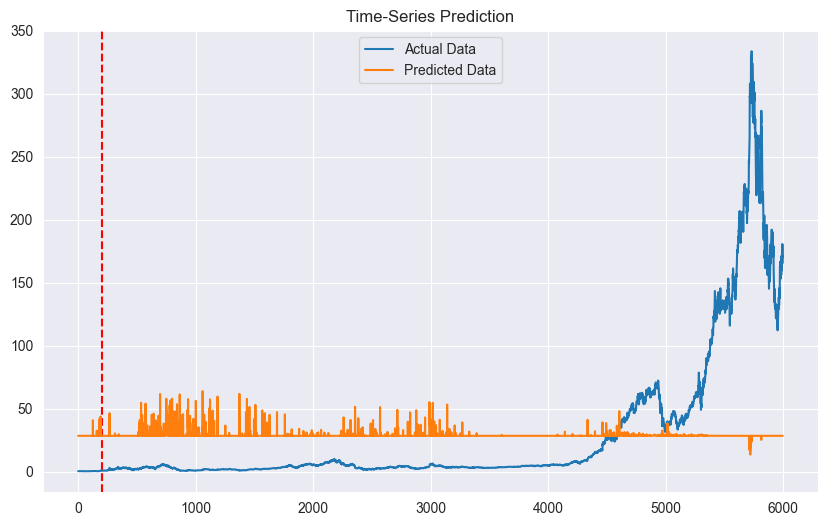

In [100]:
train_predict = model(df_x_ss)
predicted = train_predict.data.numpy()
label_y = df_y_ms.data.numpy()

predicted= ms.inverse_transform(predicted)
label_y = ms.inverse_transform(label_y)
plt.figure(figsize=(10,6))
plt.axvline(x=200, c='r', linestyle='--')

plt.plot(label_y, label='Actual Data')
plt.plot(predicted, label='Predicted Data')
plt.title('Time-Series Prediction')
plt.legend()
plt.show()